# The Art of Memory Loss
### and the Art of Memory Loss and [...]
#### by Dominic Zimmer

<div class="alert alert-info">
“Die Kunst des Gedächtnisverlustes beschäftigt sich damit, trotz großer Vergesslichkeit auf lange Sicht stets die Richtigen Antworten zu wissen.”
    
— *Irgendjemand, Saarbrücken 2023*
</div>

<div class="img-row">
<img src="https://cdn-icons-png.flaticon.com/256/2491/2491325.png" />
<img src="https://cdn-icons-png.flaticon.com/512/3997/3997691.png"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Google_%22G%22_Logo.svg/2008px-Google_%22G%22_Logo.svg.png" />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/ChatGPT_logo.svg/1024px-ChatGPT_logo.svg.png" />
<img src="https://static.vecteezy.com/system/resources/previews/023/636/525/original/3d-rendering-radiation-icons-sign-caution-danger-symbol-free-png.png" />
<img src="https://thegraphicsfairy.com/wp-content/uploads/2016/07/Frog-Drawing-Green-3-GraphicsFairy.jpg" />
</div>

# Frösche, Wetten, Wetter und Wetterfrösche
motivierendes bildchen

TODO: 2-state beispiel

```mermaid
stateDiagram-v2
    direction lr
    l --> r: p
    l --> l: 1-p
    r --> r: 1-q
    r --> l: q
```

## Frösche

<div class="alert alert-info">
    
- ein Frosch sitzt auf einer von zwei Seerosen $S = \{l, r\}$
- mit $p$ hüpft er von $l$ nach $r$
- mit $q$ hüpft er von $r$ nach $l$
- mit $1-p$ bzw $1-q$ bleibt er sitzen
- er beginnt auf $s_0 = l$
    
</div>

<div class="alert alert-success">
    
Wie oft ist der Frosch im Schnitt in $l$, wie oft in $r$?

</div>

## Frösche Simulieren

In [1]:
import numpy as np
uniform = np.random.random # Zufall in [0, 1]
# Kein numpy? -> from random import random as uniform

p = 0.6 # von l nach r
q = 0.2 # von r nach l
N = 100_000 # Simulationen

# Los geht's!

In [5]:
visits = [0, 0]
cur = 0
for i in range(N):
    if cur == 0:
        if uniform() < p:
            cur = 1
            visits[1] += 1
        else:
            visits[0] += 1
    elif cur == 1:
        if uniform() < q:
            cur = 0
            visits[0] += 1
        else:
            visits[1] += 1
n = sum(visits)
print(f"{n}/{N}")
print(f"  {visits[0]/n:.4f} of the time at 0 ({visits[0]} total)")
print(f"  {visits[1]/n:.4f} of the time at 1 ({visits[1]} total)")


100000/100000
  0.2495 of the time at 0 (24945 total)
  0.7506 of the time at 1 (75055 total)


<div class="alert alert-warning">

**Warum** ist der Frosch im Schnitt 25% in $l$ und 75% in $r$?

</div>

## Frösche Analysieren

<div class="alert alert-info">
    
Die Wahrscheinlichkeiten für Wechsel sind
    
$P(l \to r) = p$ und $P(r \to l) = q$

</div>

<div class="alert alert-success">

Wie können wir $P(\text{Frosch links})$ für große $t$ vorraussagen?
    
</div>


| $t$ | $P(\text{ Frosch links zu }t)$ | $P(\text{ Frosch rechts zu }t)$ |
| -------- | -------- | -------- |
| $0$ | <span>$1$</span> | <span>$0$</span> |

## Frösche Analysieren

<div class="alert alert-info">
    
Die Wahrscheinlichkeiten für Wechsel sind $P(l \to r) = p$ und $P(r \to l) = q$

</div>

<div class="alert alert-success">

Wie können wir $P(\text{Frosch links})$ für große $t$ vorraussagen?
    
</div>

| $t$ | $P(\text{ Frosch links zu }t)$ | $P(\text{ Frosch rechts zu }t)$ |
| -------- | -------- | -------- |
| $0$ | <span>$1$</span> | <span>$0$</span> |
| <span>$1$</span> | <span>$1-p$</span> | <span>$p$</span> |
| <span>$2$</span> | <span>$(1-p)^2 + pq$</span> | <span>$p(1-p) + p(1-q)$</span>|

<div class="alert alert-info">

$$
\begin{align*}
P_{t+1}(\text{Frosch links}) &= P_t(\text{Frosch links}) \cdot P(l \to l) \\
& + P_t(\text{Frosch rechts}) \cdot P(r \to l)\\
P_{t+1}(\text{Frosch rechts}) &= P_t(\text{Frosch rechts}) \cdot P(r \to r) \\
&+ P_t(\text{Frosch links}) \cdot P(l \to r)
\end{align*}
$$
    
</div>

## Frösche Analysieren

Unser Experiment zeigt für große $t$:
$$
    P_{t-2}(\text{Frosch links}) \approx P_{t-1}(\text{Frosch links}) \approx P_{t}(\text{Frosch links}) \approx \dots L
$$

<div class="alert alert-info">

$$
\begin{align*}
P_{t+1}(\text{Frosch links}) &= P_t(\text{Frosch links}) \cdot P(l \to l) \\
& + P_t(\text{Frosch rechts}) \cdot P(r \to l)\\
P_{t+1}(\text{Frosch rechts}) &= P_t(\text{Frosch rechts}) \cdot P(r \to r) \\
&+ P_t(\text{Frosch links}) \cdot P(l \to r)
\end{align*}
$$
    
</div>

## Frösche Analysieren

Unser Experiment zeigt für große $t$:
$$
    P_{t-2}(\text{Frosch links}) \approx P_{t-1}(\text{Frosch links}) \approx P_{t}(\text{Frosch links}) \approx \dots L
$$
<div class="alert alert-info">

$$
\begin{align*}
L &= L \cdot P(l \to l) + R \cdot P(r \to l)\\
R &= R \cdot P(r \to r) + L \cdot P(l \to r)\\
1 &= L + R
\end{align*}
$$
    
</div>


$$
\begin{align*}
L &= \frac{q}{p+q} = 25\% \\
R &= \frac{p}{p+q} = 75\%
\end{align*}
$$

# Mathematik und Gedächtnisverlust

<div class="alert alert-info">
    
**Definition** *(Gedächtnislosigkeit)*

Ein Prozess ist *gedächtnislos*, wenn zu jedem Zeitpunkt seine Entscheidung nur vom aktuellen Zustand abhängt, nicht aber von dem Weg, wie der aktuelle Zustand erreicht wurde.
</div>

<div class="alert alert-success">
    
**Beobachtung**

Das Verhalten der Frösche ist gedächtnislos. Die Aktionen des Frosches und deren Wahrscheinlichkeiten $p$ und $1-p$ (bzw $q$ und $1-q$) hängen nur von der aktuellen Seerose ab. 
</div>

# Frösche — Formell

> Der Frosch kann auf der linken oder rechten Seerose sitzen.

Wir modellieren die beiden Seerosen als die zwei Zustände $S = \{L, R\}$.

> Zufällig hüpft er zwischen den Seerosen hin und her

Die Zufallsvariable $X_t$ beschreibt wo der Frosch zum Zeitpunkt $t$ ist.

Wir könnten zum Beispiel beobachten, dass

$$
\dots \quad X_3 = L \quad X_4 = L \quad X_5 = R \quad X_6 = L \quad \dots
$$

> Am Anfang sitzt der Frosch auf der linken Seerose.

Die Wahrscheinlichkeit $P(X_0 = L) = 1$.

Analog ergibt sich $P(X_0 = R) = 0$.

> Der Frosch hüpft mit Wahrscheinlichkeit $p$ von links nach rechts

Die Übergangswahrscheinlichkeit, dass der Frosch zum Zeitpunkt $t-1$ in $L$, und zum Zeitpunkt $t$ in $R$ ist, ist $p$.

$$
\begin{align*}
&\phantom{==}\color{gray}{P(X_t = R \mid X_{t-1} = L, X_{t-2} = L)}\\ 
&=\color{gray}{P(X_t = R \mid X_{t-1} = L, X_{t-2} = R)}\\ 
&= P(X_t = R \mid X_{t-1} = L) \\&= p
\end{align*}
$$

Da die Übergangswahrscheinlichkeiten zum Zeitpunkt $t$ nur von $X_t$ abhängen, schreiben wir kurzerhand

$$
P(X_t = R | X_{t-1} = L) = P(L \to R) = m_{L R}
$$

Wir können alle Übergangswahrscheinlichkeiten $P(s \to s')$ elegant als Matrix $M$ notieren:

$$
M = 
\begin{pmatrix} m_{LL} & m_{LR} \\ m_{RL} & m_{RR}
\end{pmatrix} = 
\begin{pmatrix} 1 - p & p \\ q & 1-q
\end{pmatrix}
$$

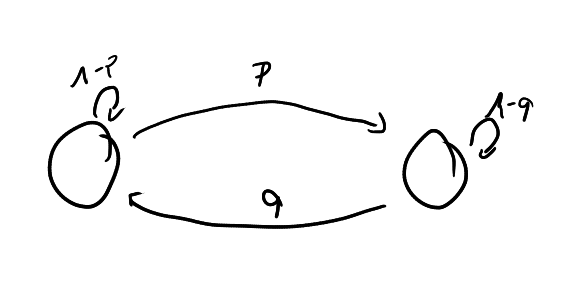

Wir können die Wahrscheinlichkeiten, dass der Frosch zum Zeitpunkt $t$ in $L$ oder $R$ ist, als Vektoren schreiben.

$$
X_0 = \begin{pmatrix}1 \\ 0\end{pmatrix}
$$

Ein Zeitschritt $t=0 \to t=1$ verändert die Verteilung gemäß $M$:

$$
X_0 = \begin{pmatrix}1 \\ 0\end{pmatrix} \to \begin{pmatrix}1-p \\ p \end{pmatrix} = X_1
$$

- die Berechnung von ganzfrüh aus der Tabelle nenen wir Matrixmultiplikation.
- MM captures the idea that "
- denn, wir können Lineare Algebra machen. $v_0^T\cdot{}M = v_1$

In [4]:

## Frösche brauchen Zufall

:::info
Viele Leute werfen Münzen in den Teich der Frösche. Wir sollen einen Frosch aussuchen, der der neue Schatzmeister werden soll. Wie können wir aus den 7 Fröschen **fair** einen auswählen?
:::

**Bedingungen**:
- Jeder Frosch wird mit $\frac{1}{7}$ ausgewählt
- Zufall nur durch die Münzen

---

## Frösche brauchen Zufall

```mermaid
stateDiagram-v2
    state "&nbsp;" as 0
    state "&nbsp;" as 1
    state "&nbsp;" as 2
    state "&nbsp;" as 3
    state "&nbsp;" as 4
    state "&nbsp;" as 5
    state "&nbsp;" as 6
    state "1" as 7
    state "2" as 8
    state "3" as 9
    state "4" as 10
    state "5" as 11
    state "6" as 12
    state "7" as 13
    state "&nbsp;" as 14
    0 --> 1: 0.5
    0 --> 2: 0.5
    1 --> 3: 0.5
    1 --> 4: 0.5
    2 --> 5: 0.5
    2 --> 6: 0.5
    3 --> 7: 0.5
    3 --> 8: 0.5
    4 --> 9: 0.5
    4 --> 10: 0.5
    4 --> 11: 0.5
    5 --> 12: 0.5
    6 --> 13: 0.5
    6 --> 14: 0.5
    14 --> 0: 1
    7 --> 7: 1
    8 --> 8: 1
    9 --> 9: 1
    10 --> 10: 1
    11 --> 11: 1
    12 --> 12: 1
    13 --> 13: 1
```

---

## Gedächtnisverlust

- Der Frosch hüpft mit $p$ nach links und $q$ nach rechts
- Die Münze fällt gleichwahrscheinlich auf Kopf oder Zahl

<div>
    
:::success
Die nächste Aktion hängt nur vom **aktuellen** Zustand ab.
Was davor geschah ist irrelevant.
:::
</div> <!-- .element: class="fragment" data-fragment-index="0" -->

---

## Bissle Mathematik

SyntaxError: invalid syntax (2451516634.py, line 3)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
) 
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()